## The global warming issue and Narratives around it<br>
### Part 3: Performing EDA on the pickled reddit dataset

In this notebook, I explore several aspects of the dataframe and also prepare the dataframe objects for further modeling.


Importing the require libraries:

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression


from nltk.corpus import stopwords

import pickle

%config InlineBackend.figure_format = 'retina'

### Part 3.1: Importing the saved dataframe

In [2]:
df_reddit = pickle.load(open('../datasets/df_reddit.pkl', 'rb'))
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,subreddit_subscribers,text_merged,subreddit
0,Kafka15,1593554514,i.redd.it,hixbtf,2,False,image,1,6157.0,cum,GlobalWarming
1,karan_negiiiii,1593497051,boringworld.org,hihj6s,0,False,Empty,1,6156.0,climat chang india,GlobalWarming
2,Hildavardr,1593479932,self.GlobalWarming,hidb5h,0,False,Empty,1,6154.0,global warm respons big compani,GlobalWarming
3,pEppapiGistfuhrer,1593455137,i.redd.it,hi5h41,1,False,image,1,6152.0,ayi let stop global warm,GlobalWarming
4,BrexitBlaze,1593455005,theguardian.com,hi5feq,2,False,link,2,6152.0,uk minist send mix messag climat commit say fu...,GlobalWarming


In [3]:
df_reddit.shape

(4828, 11)

### Feature engineering: adding three new columns

---

In [4]:
#Counting the charcaters and word in "text_merged"
df_reddit["text_char_count"] = df_reddit["text_merged"].map(lambda x: len(x))
df_reddit["text_word_count"] = df_reddit["text_merged"].map(lambda x: len(x.split(" ")))

#Sentiment analyzer
sent = SentimentIntensityAnalyzer()

df_reddit['sentiment_score'] = df_reddit["text_merged"].apply(lambda x: sent.polarity_scores(x)['compound'])


df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')


---

In [5]:
df_reddit.shape

(4828, 15)

In [6]:
df_reddit["subreddit"].unique()

array(['GlobalWarming', 'ConspiracyTheory'], dtype=object)

- Defining the target:

In [7]:
df_reddit['target'] = df_reddit['subreddit'].replace({"GlobalWarming": 1, "ConspiracyTheory": 0})
targets = df_reddit['target']

In [8]:
df_reddit.head(2)

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,subreddit_subscribers,text_merged,subreddit,text_char_count,text_word_count,sentiment_score,date,target
0,Kafka15,1593554514,i.redd.it,hixbtf,2,False,image,1,6157.0,cum,GlobalWarming,3,1,0.0,2020-06-30 22:01:54,1
1,karan_negiiiii,1593497051,boringworld.org,hihj6s,0,False,Empty,1,6156.0,climat chang india,GlobalWarming,18,3,0.0,2020-06-30 06:04:11,1


Exploring the ["text_merged"] column:

In [9]:
df_reddit["text_merged"][5]

'mmm ye'

In [10]:
df_reddit["domain"].value_counts()
df_reddit.drop(columns="domain", inplace = True)

Looks good !
Now, checking the counts:

In [11]:
sub_ch_mask = df_reddit["target"] == 1
sub_ct_mask = df_reddit["target"] == 0
df_reddit[sub_ct_mask]["text_merged"].count()

894

In [12]:
df_reddit['target'] = df_reddit['subreddit'].replace({"GlobalWarming": 1, "ConspiracyTheory": 0})

In [13]:
df_reddit['over_18'] = df_reddit['over_18'].astype("int")

In [14]:
df_reddit.groupby("target")["sentiment_score"].describe().T

target,0,1
count,894.000000,3934.000000
mean,-0.090773,0.061600
std,0.480822,0.388136
min,-0.996900,-0.997900
25%,-0.476700,0.000000
50%,0.000000,0.000000
75%,0.128000,0.226300
max,0.992700,0.998700


Checking for datatypes:

## One last step, removing the repeated authors (have to explore this option later)

In [15]:
#df_reddit.drop_duplicates(subset=["author"], inplace=True)

In [16]:
df_reddit

,author,created_utc,id,num_comments,over_18,post_hint,score,subreddit_subscribers,text_merged,subreddit,text_char_count,text_word_count,sentiment_score,date,target
0,Kafka15,1593554514,hixbtf,2,0,image,1,6157.0,cum,GlobalWarming,3,1,0.0000,2020-06-30 22:01:54,1
1,karan_negiiiii,1593497051,hihj6s,0,0,Empty,1,6156.0,climat chang india,GlobalWarming,18,3,0.0000,2020-06-30 06:04:11,1
2,Hildavardr,1593479932,hidb5h,0,0,Empty,1,6154.0,global warm respons big compani,GlobalWarming,31,5,0.2263,2020-06-30 01:18:52,1
3,pEppapiGistfuhrer,1593455137,hi5h41,1,0,image,1,6152.0,ayi let stop global warm,GlobalWarming,24,5,-0.0772,2020-06-29 18:25:37,1
4,BrexitBlaze,1593455005,hi5feq,2,0,link,2,6152.0,uk minist send mix messag climat commit say fu...,GlobalWarming,66,13,0.2960,2020-06-29 18:23:25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,[deleted],1349719843,115d9u,0,0,Empty,0,2610.5,us air forc superson fli saucer declassifi,ConspiracyTheory,42,7,0.0000,2012-10-08 18:10:43,0
4824,[deleted],1348231298,108ubr,0,0,Empty,1,2610.5,dae think sin ruin r conspiraci fascist totali...,ConspiracyTheory,500,81,-0.9857,2012-09-21 12:41:38,0
4825,[deleted],1347716678,zxb87,1,0,Empty,9,2610.5,conspiraci subreddit empti,ConspiracyTheory,26,3,0.0000,2012-09-15 13:44:38,0
4826,aayawa,1344626686,y0fkg,3,0,Empty,0,2610.5,one world govern possibl stabl,ConspiracyTheory,30,5,0.0000,2012-08-10 19:24:46,0


In [17]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   author                 4828 non-null   object        
 1   created_utc            4828 non-null   int64         
 2   id                     4828 non-null   object        
 3   num_comments           4828 non-null   int64         
 4   over_18                4828 non-null   int64         
 5   post_hint              4828 non-null   object        
 6   score                  4828 non-null   int64         
 7   subreddit_subscribers  4828 non-null   float64       
 8   text_merged            4828 non-null   object        
 9   subreddit              4828 non-null   object        
 10  text_char_count        4828 non-null   int64         
 11  text_word_count        4828 non-null   int64         
 12  sentiment_score        4828 non-null   float64       
 13  dat

In [18]:
df_reddit["post_hint"].unique()

array(['image', 'Empty', 'link', 'rich:video', 'hosted:video', 'self'],
      dtype=object)

Some visulaztion:

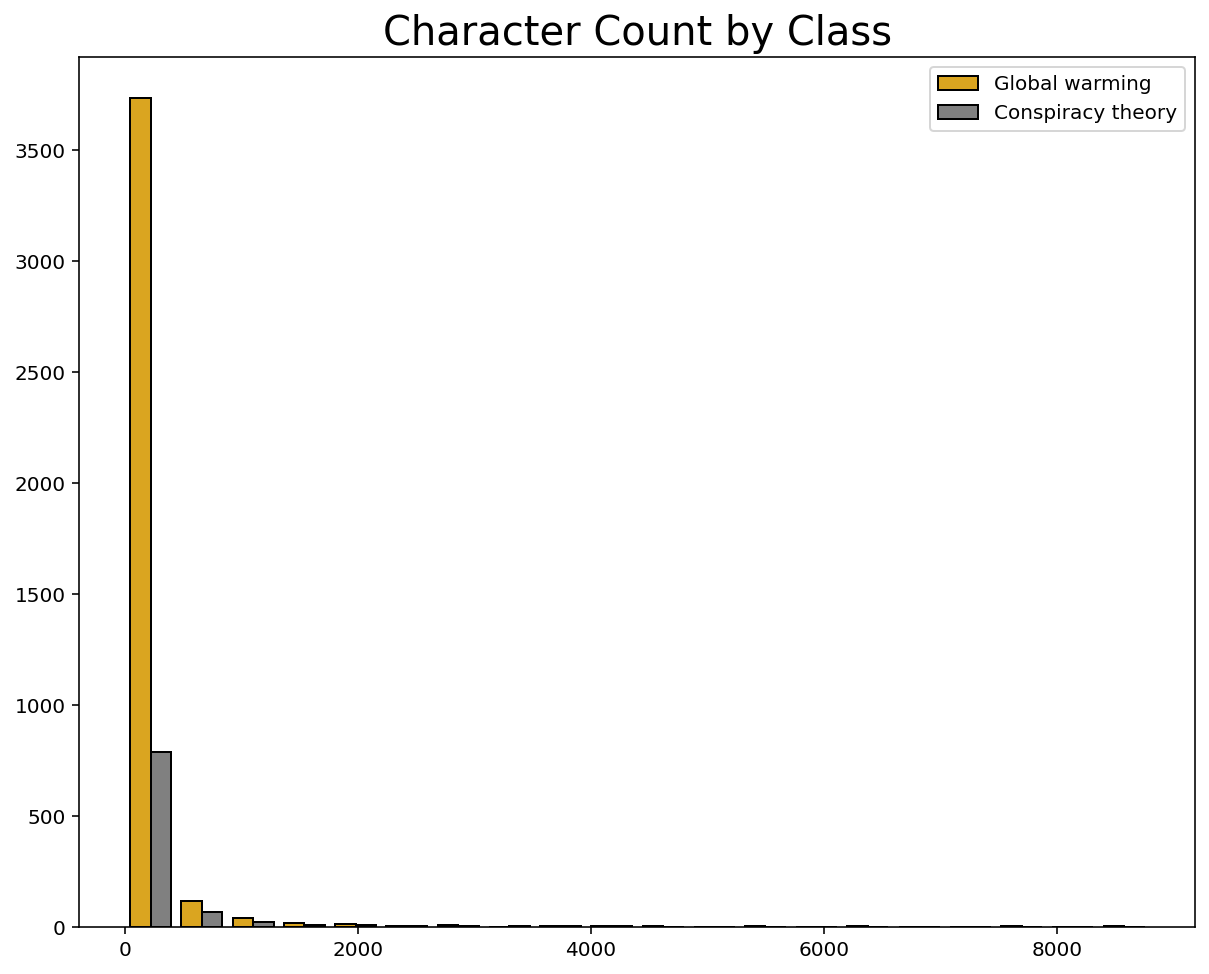

In [19]:
#%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(10,8))
plt.hist([df_reddit[sub_ch_mask]['text_char_count'], 
          df_reddit[sub_ct_mask]['text_char_count']],
         bins=20, color=['goldenrod', 'grey'], ec='k')
plt.title('Character Count by Class', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])
plt.show()

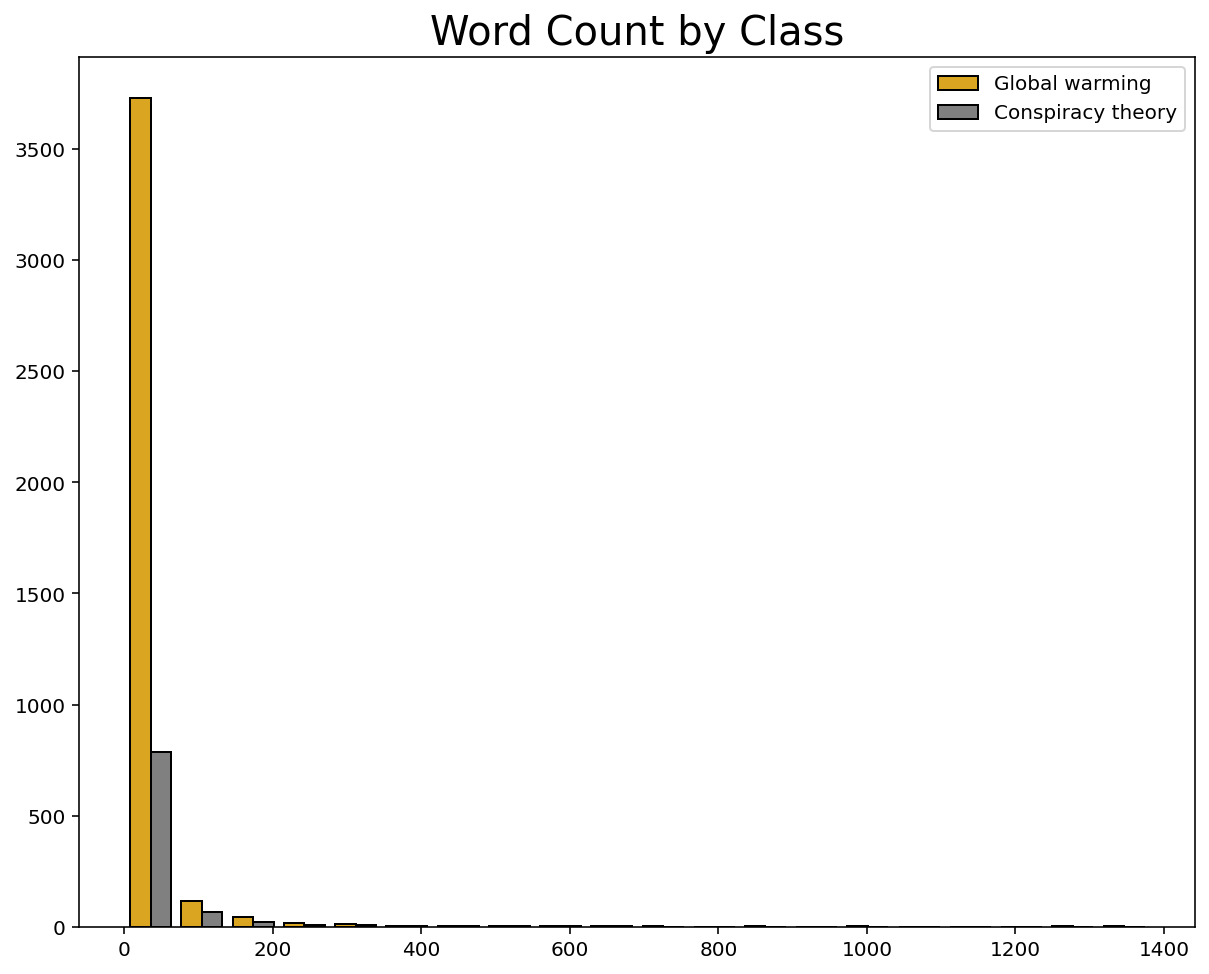

In [20]:
plt.figure(figsize=(10,8))
plt.hist([df_reddit[sub_ch_mask]['text_word_count'], 
          df_reddit[sub_ct_mask]['text_word_count']],
         bins=20, color=['goldenrod', 'grey'], ec='k')
plt.title('Word Count by Class', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])

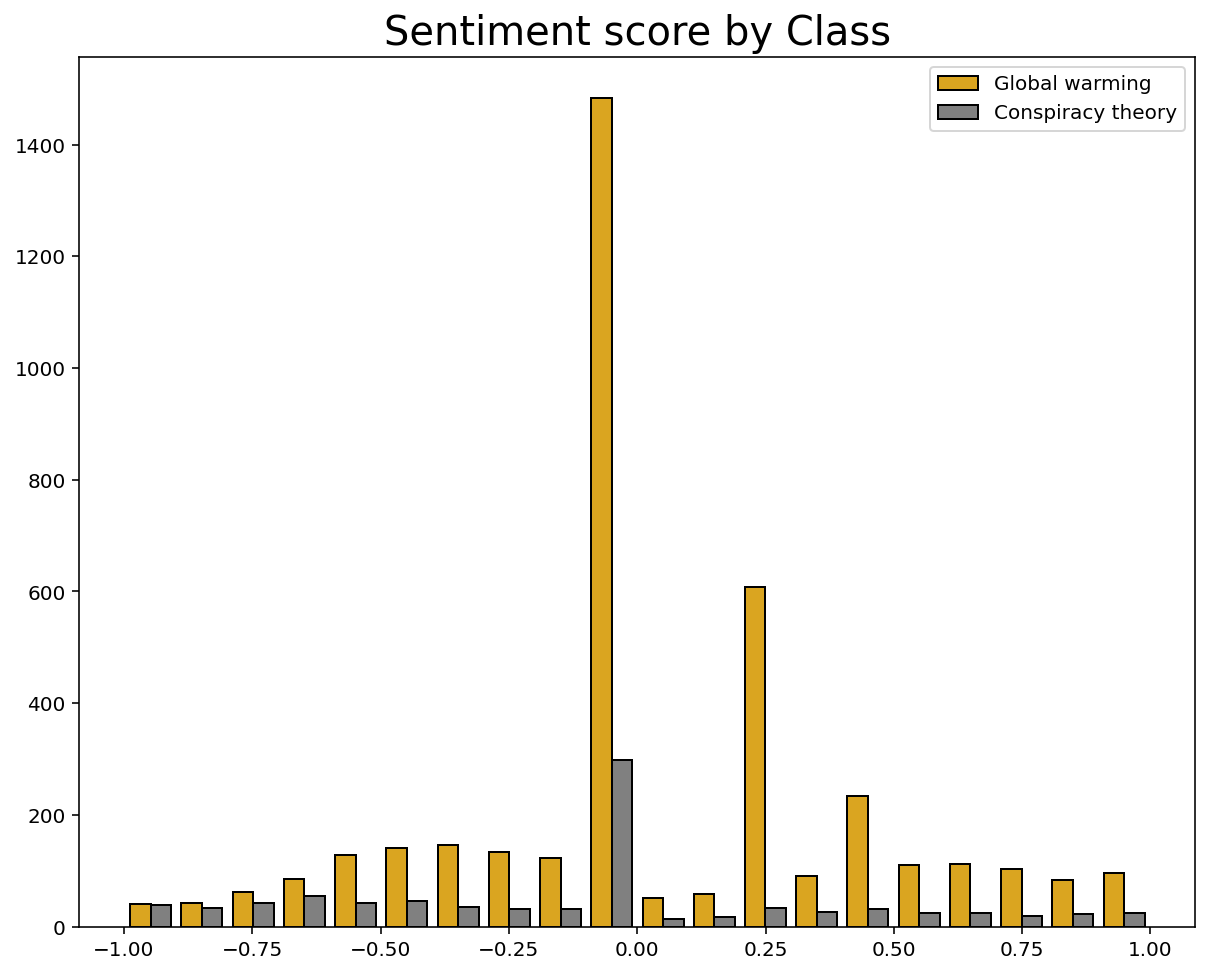

In [21]:
plt.figure(figsize=(10,8))
plt.hist([df_reddit[sub_ch_mask]['sentiment_score'], 
          df_reddit[sub_ct_mask]['sentiment_score']],
         bins=20, color=['goldenrod', 'grey'], ec='k')
plt.title('Sentiment score by Class', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])

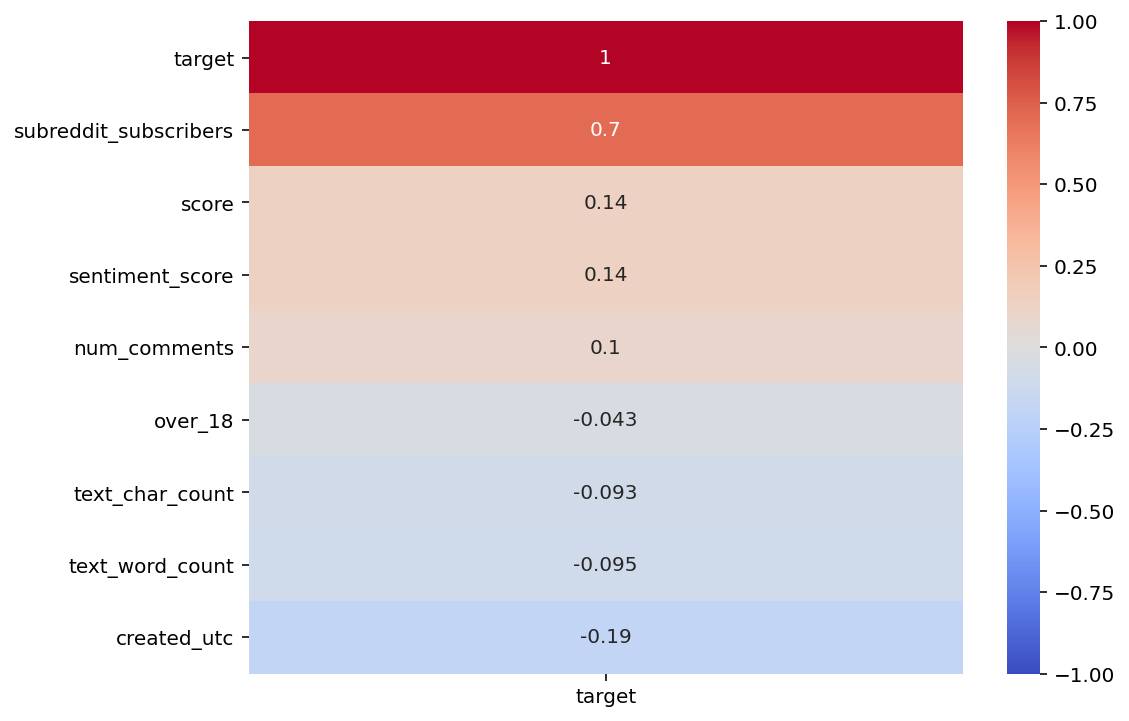

In [22]:
df_reddit_corr = df_reddit.corr()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
plt.savefig("../plots/EDA_corr_plots.png")

In [23]:
df_reddit['created_utc']

0       1593554514
1       1593497051
2       1593479932
3       1593455137
4       1593455005
           ...    
4823    1349719843
4824    1348231298
4825    1347716678
4826    1344626686
4827    1344530968
Name: created_utc, Length: 4828, dtype: int64

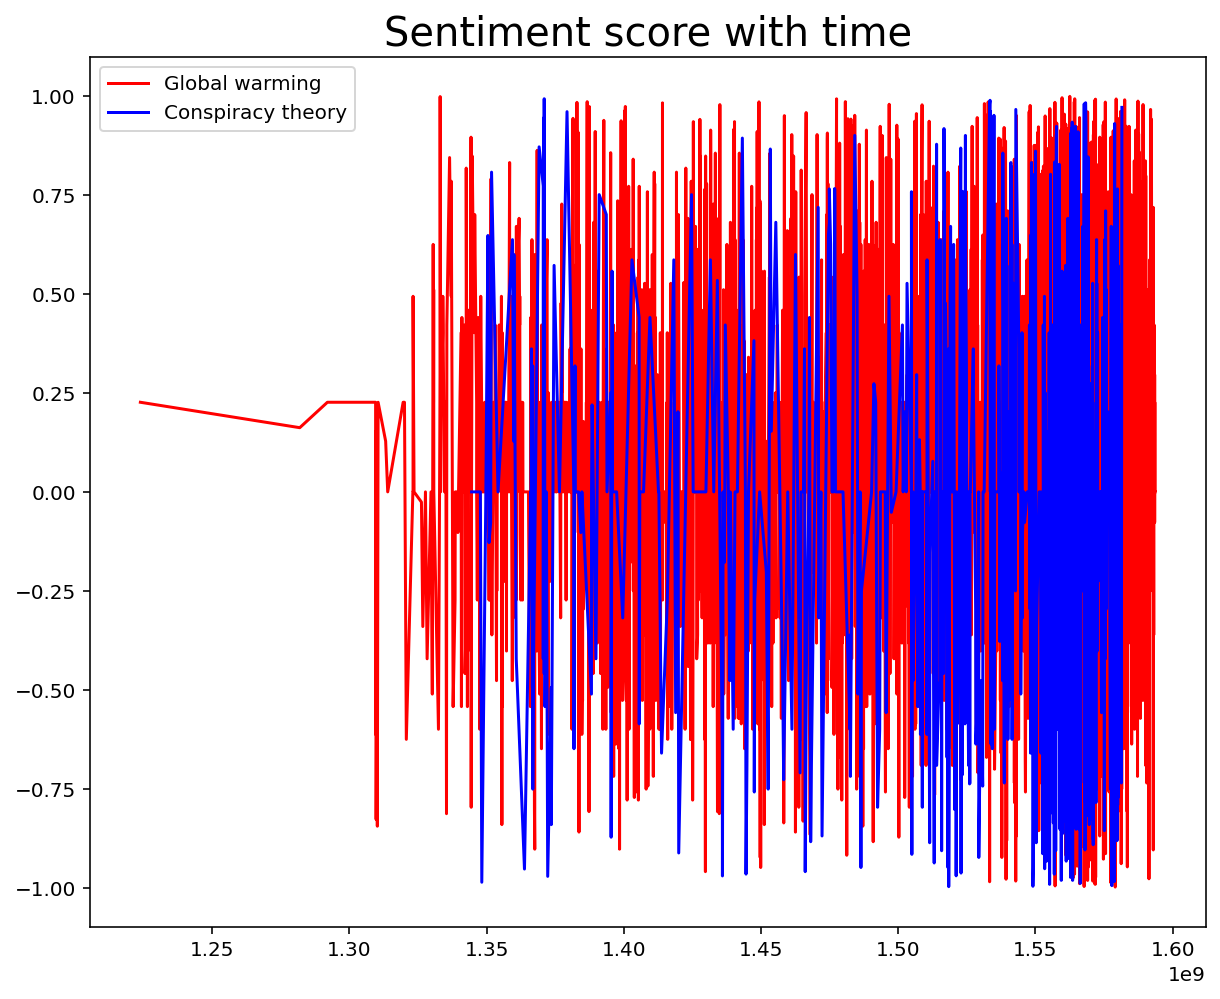

In [24]:
plt.figure(figsize=(10,8))
plt.plot(df_reddit[sub_ch_mask]['created_utc'], df_reddit[sub_ch_mask]['sentiment_score'], color="red")
plt.plot(df_reddit[sub_ct_mask]['created_utc'], df_reddit[sub_ct_mask]['sentiment_score'], color="blue")


plt.title('Sentiment score with time', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])

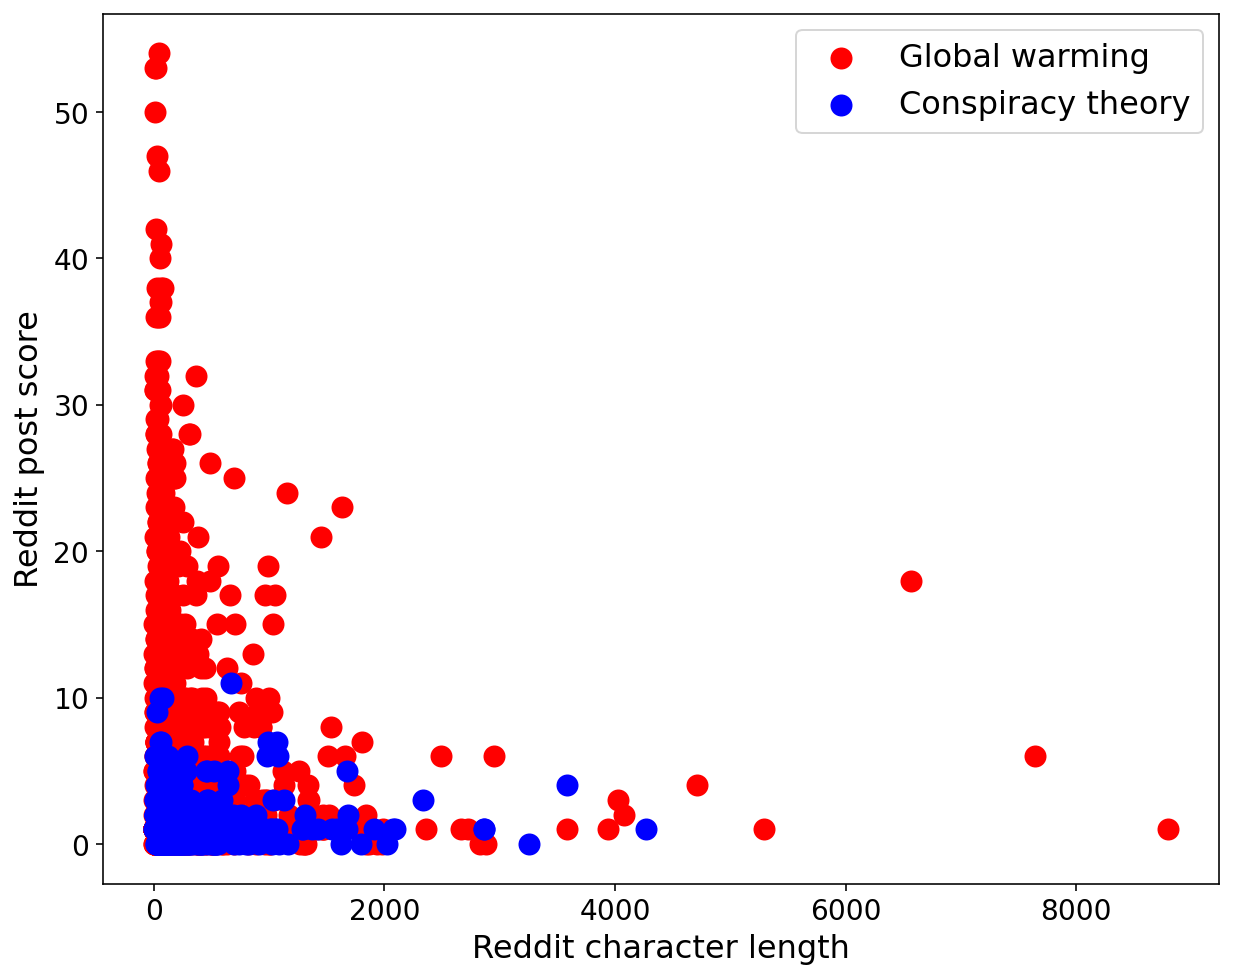

In [25]:
plt.figure(figsize=(10,8))

#POlotting target 1

x_plt = df_reddit[sub_ch_mask]['text_char_count']
y_plt = (df_reddit[sub_ch_mask]['score'])
plt.scatter(x_plt, y_plt, color="red", s= 100)
#plt.errorbar(x_mean_plt, y_mean_plt, xerr=x_err_plt, yerr=y_err_plt)

x_plt = df_reddit[sub_ct_mask]['text_char_count']
y_plt = (df_reddit[sub_ct_mask]['score'])
plt.scatter(x_plt, y_plt, color="blue", s = 100)





#plt.title('Correlation between post length and sentiment score per target groups', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'],fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Reddit post score", fontsize = 16)
plt.xlabel("Reddit character length", fontsize = 16);
#plt.xscale("log")

plt.savefig("../plots/EDA_sent_score.png")

In [26]:
def make_hist(df_reddit, column, title):
    sub_ch_mask = df_reddit["target"] == 1
    sub_ct_mask = df_reddit["target"] == 0
    
    plt.figure(figsize=(21, 8))
    
    plt.subplot(121)
    plt.hist(df_reddit[sub_ch_mask][column], color = 'salmon')
    plt.title('Global warming: distribution of ' + title, size= 16)
    plt.ylabel('# of Submissions', size= 14)
    plt.xlabel(title,size= 14)
    
    plt.subplot(122)
    plt.hist(df_reddit[sub_ct_mask][column], color = 'lightblue')
    plt.title('Conspiracy theory: distribution of ' + title, size= 16)
    plt.ylabel('# of Submissions', size= 14)
    plt.xlabel(title, size= 14)
    
    return plt.figure


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

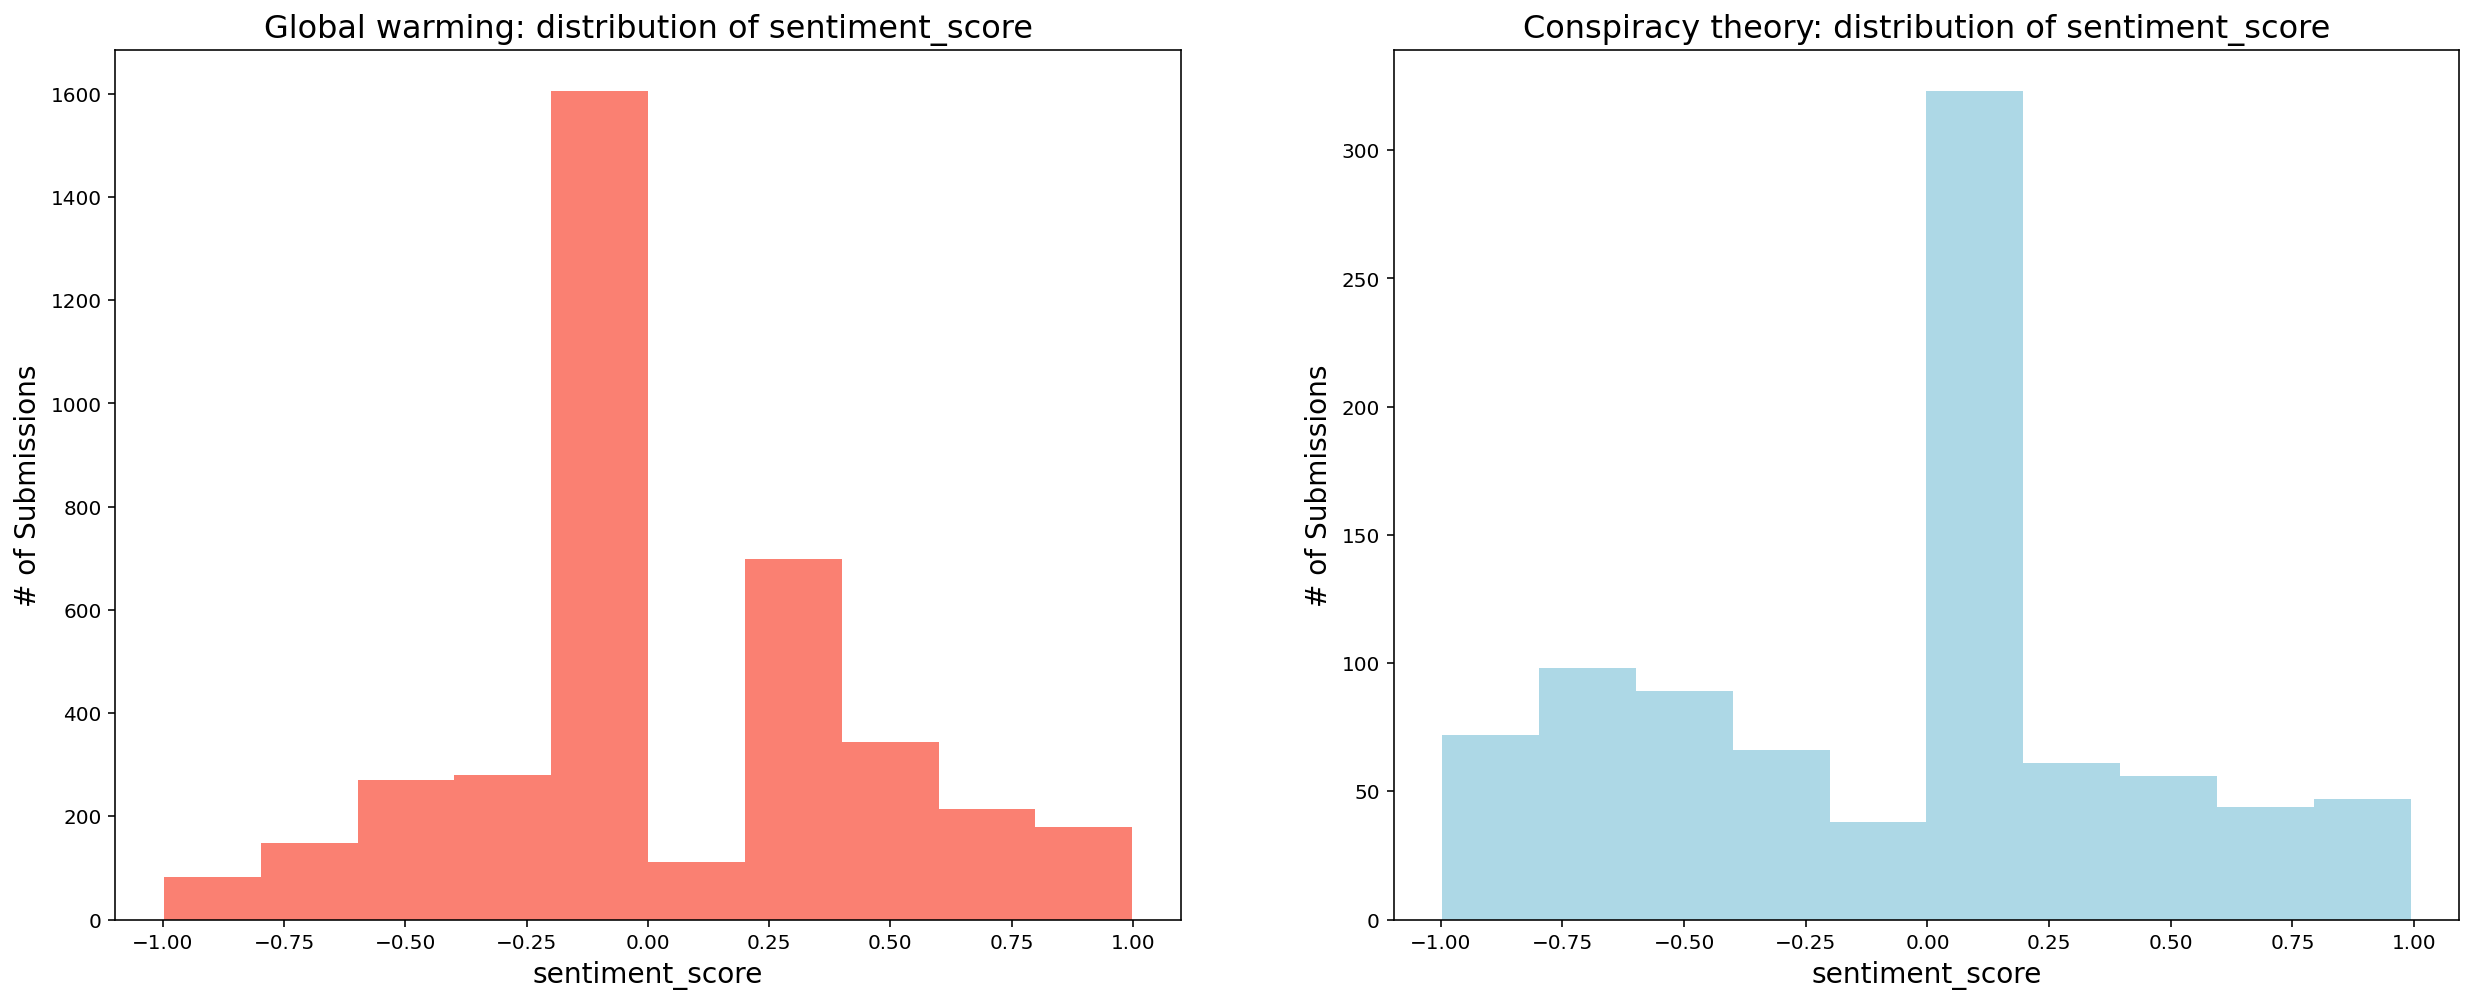

In [27]:
make_hist(df_reddit, 'sentiment_score', 'sentiment_score')

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

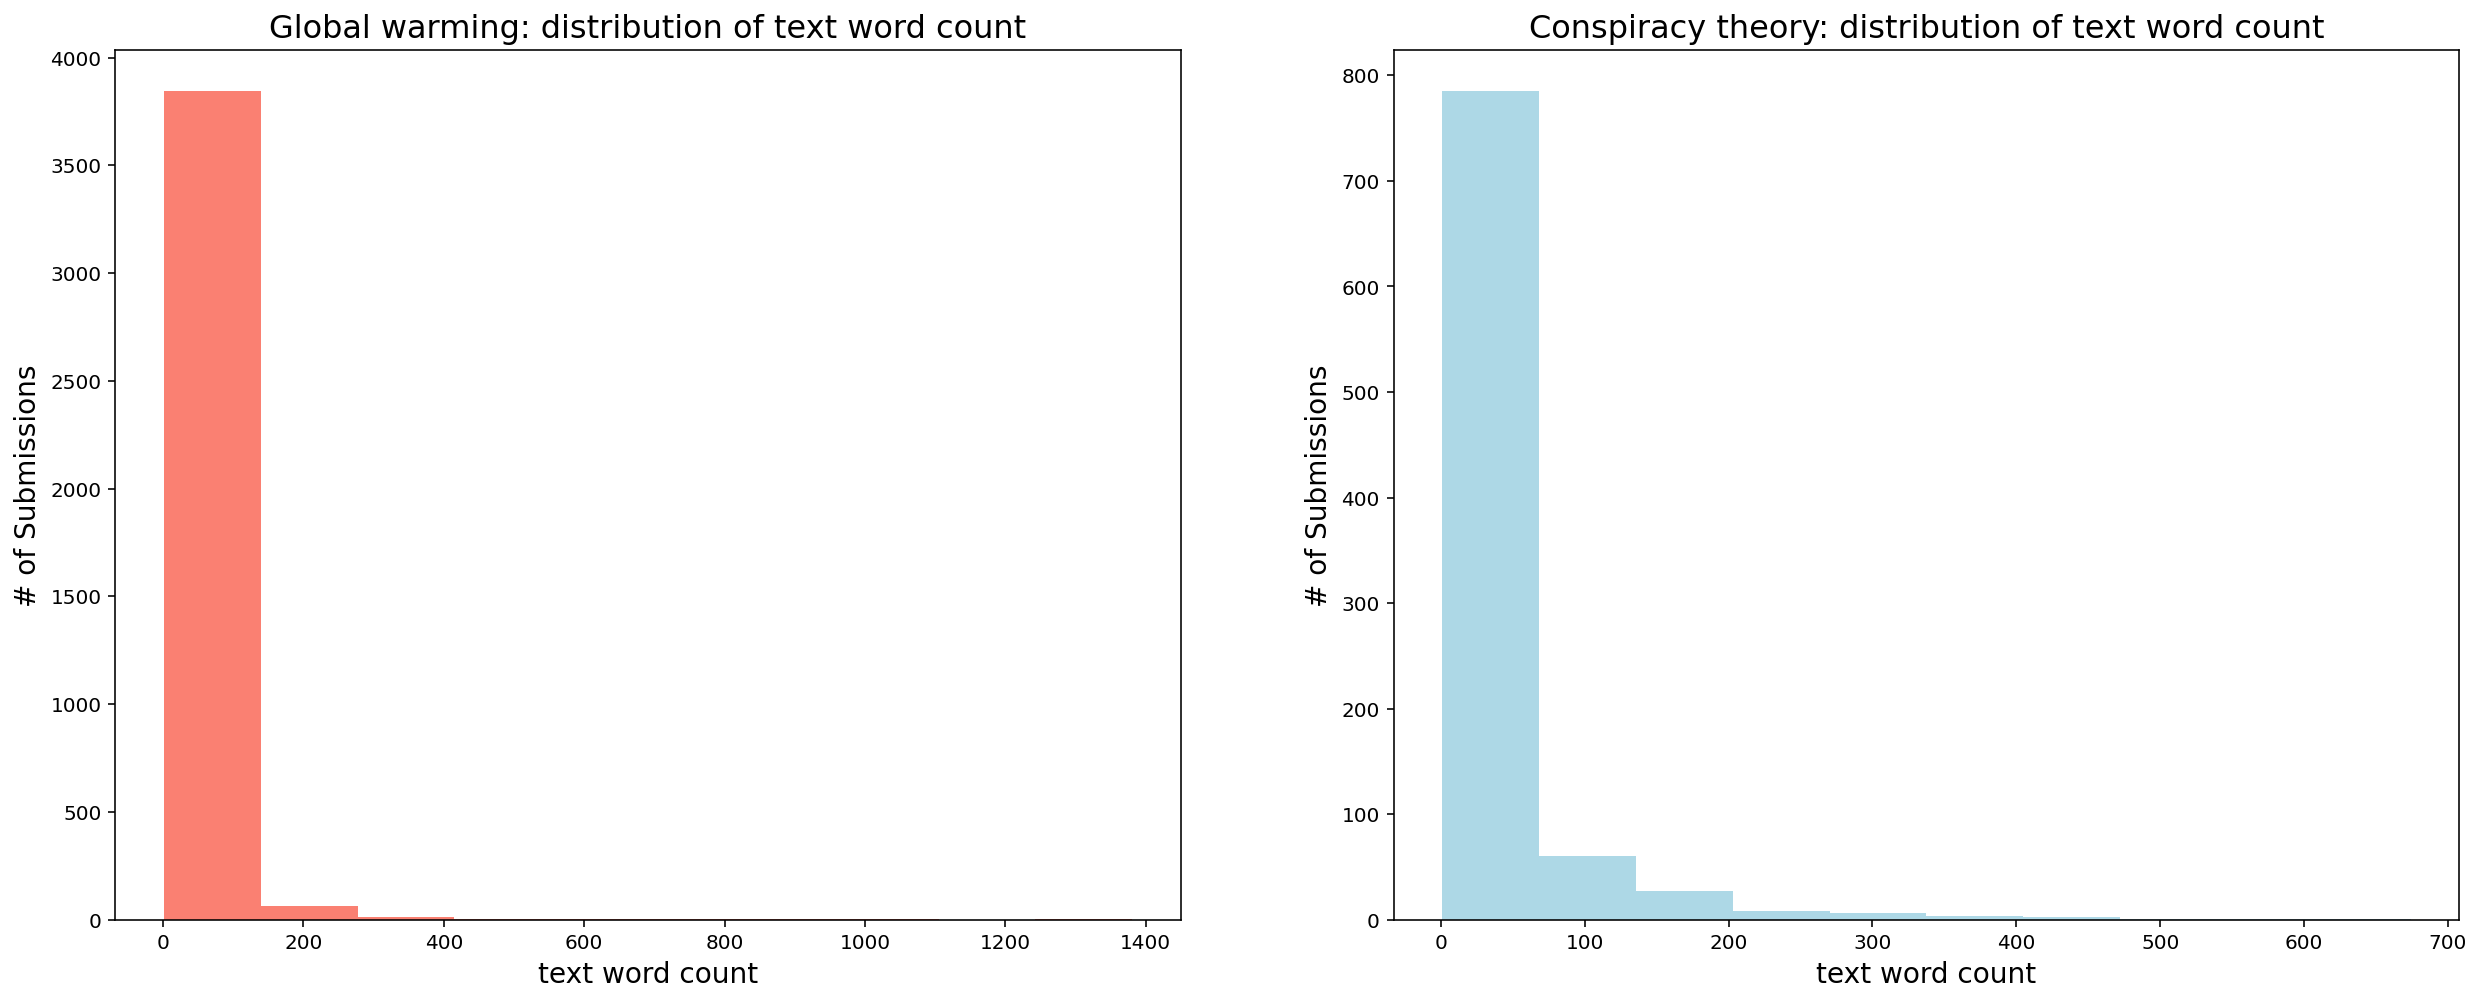

In [28]:
make_hist(df_reddit, 'text_word_count', 'text word count')

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

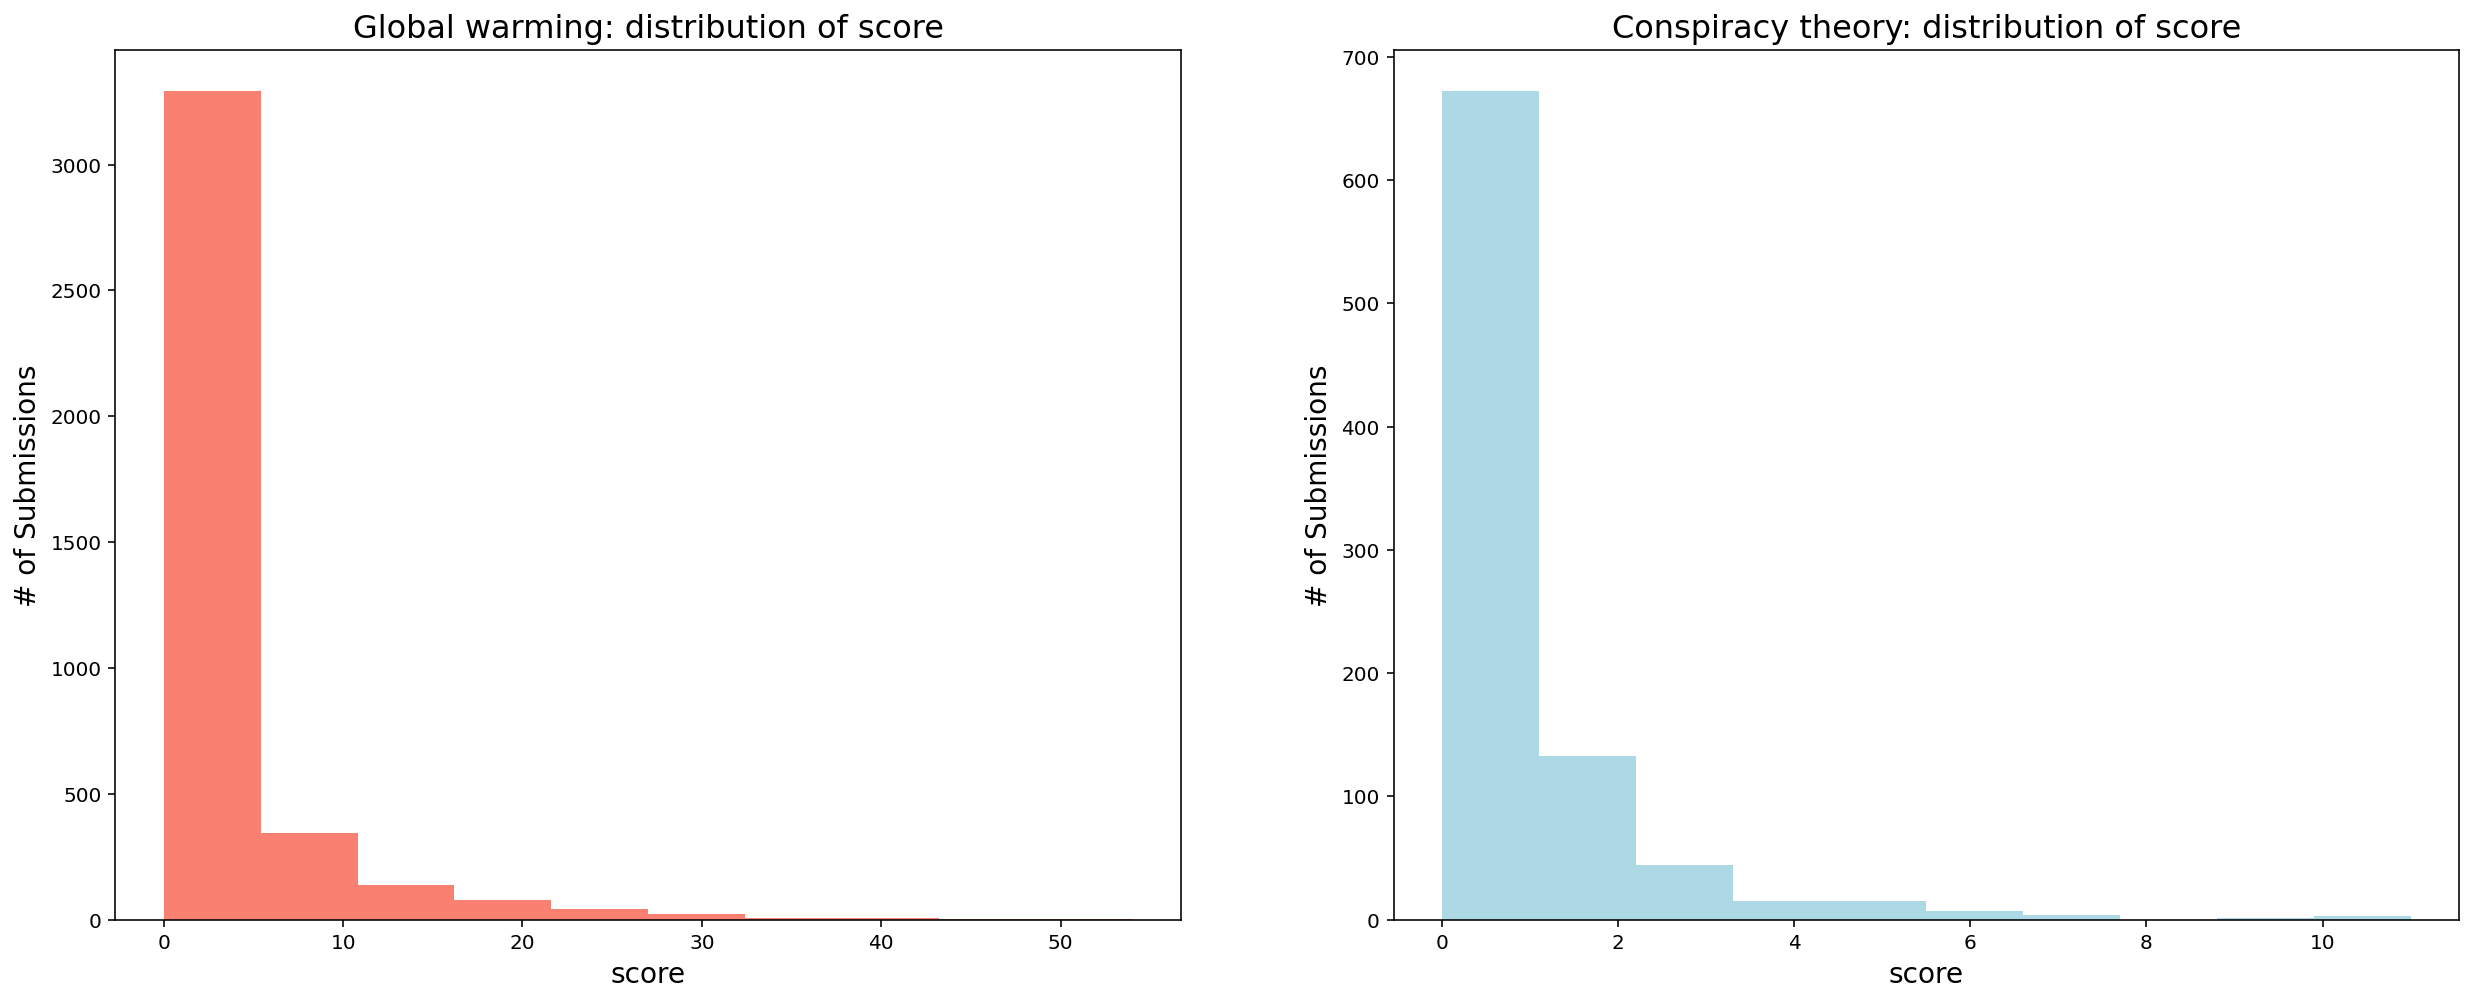

In [29]:
make_hist(df_reddit, 'score', 'score')

In [30]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   author                 4828 non-null   object        
 1   created_utc            4828 non-null   int64         
 2   id                     4828 non-null   object        
 3   num_comments           4828 non-null   int64         
 4   over_18                4828 non-null   int64         
 5   post_hint              4828 non-null   object        
 6   score                  4828 non-null   int64         
 7   subreddit_subscribers  4828 non-null   float64       
 8   text_merged            4828 non-null   object        
 9   subreddit              4828 non-null   object        
 10  text_char_count        4828 non-null   int64         
 11  text_word_count        4828 non-null   int64         
 12  sentiment_score        4828 non-null   float64       
 13  dat

# What are the most common use3d words

In [31]:
cvec = CountVectorizer(stop_words='english', min_df=4, max_df=1.0)


In [32]:
term_mat = cvec.fit_transform(df_reddit['text_merged'])

In [33]:
len(cvec.get_feature_names())

2998

To save on space, we'll use pandas `SparseDataFrame` call, which optimizes storage when most of our entires are 0.

In [34]:
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

In [35]:
term_df.head()

,ab,abandon,abil,abl,absolut,absorb,absorpt,abstract,absurd,abus,...,york,yorker,young,younger,youth,youtu,youtub,zealand,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We'll insert the target back in...

In [36]:
term_df.insert(0, 'targets', targets)

In [37]:
term_df.head()

,targets,ab,abandon,abil,abl,absolut,absorb,absorpt,abstract,absurd,...,york,yorker,young,younger,youth,youtu,youtub,zealand,zero,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
term_df.head()

,targets,ab,abandon,abil,abl,absolut,absorb,absorpt,abstract,absurd,...,york,yorker,young,younger,youth,youtu,youtub,zealand,zero,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
term_df.groupby('targets').sum().T

targets,0,1
ab,1,3
abandon,4,3
abil,1,12
abl,8,38
absolut,2,8
...,...,...
youtu,13,6
youtub,74,37
zealand,4,6
zero,13,28


By transposing the outputing and sorting by one of our groups, we can see what our most prevalent words are.

We can grab the list of the top 20 terms in each of our classes.

In [40]:
top_words_ct = list(term_df.groupby('targets').
    mean().T.sort_values(0, ascending=False).head(20).index)

top_words_ch = list(term_df.groupby('targets').
    mean().T.sort_values(1, ascending=False).head(20).index)

In [41]:
top_words_overlap = [word for word in top_words_ch if word in top_words_ct]

In [42]:
top_words_overlap

['year',
 'http',
 'world',
 'peopl',
 'like',
 'make',
 'use',
 'com',
 'think',
 'time']

In [43]:
def plot_cvec_dist(words, dataframe, target = 'targets', classes = [0,1]):
    nrows = len(words)//2 if not len(words)%2 else len(words)//2 + 1
    class_0 = dataframe[dataframe[target]==classes[0]]
    class_1 = dataframe[dataframe[target]==classes[1]]
    fig, ax = plt.subplots(ncols=2, nrows=nrows, figsize=(20, 7*nrows))
    ax = ax.ravel()
    
    for i, word in enumerate(words):
        counts_0 = class_0[word].value_counts().to_dict()
        counts_1 = class_1[word].value_counts().to_dict()
        mean_0 = class_0[word].mean()
        mean_1 = class_1[word].mean()
        ax[i].bar(counts_0.keys(), counts_0.values(), color='goldenrod', alpha=.3)
        for keys, values in counts_0.items():
            ax[i].text(keys-.1, values, s=values, fontsize=14, color='goldenrod')
        for keys, values in counts_1.items():
            ax[i].text(keys+.1, values, s=values, fontsize=14, color='grey')
        ax[i].bar(counts_1.keys(), counts_1.values(), color='grey', alpha=.3)
        ymin, ymax = ax[i].get_ylim()
        #ax[i].plot([mean_0]*2, [ymin, ymax], ':', color='goldenrod')
        #ax[i].plot([mean_1]*2, [ymin, ymax], ':', color='grey')
        ax[i].set_title(f'{word} frequency counts\nmeans: {mean_0:0.02f} vs {mean_1:0.02f}')
        ax[i].legend(classes)

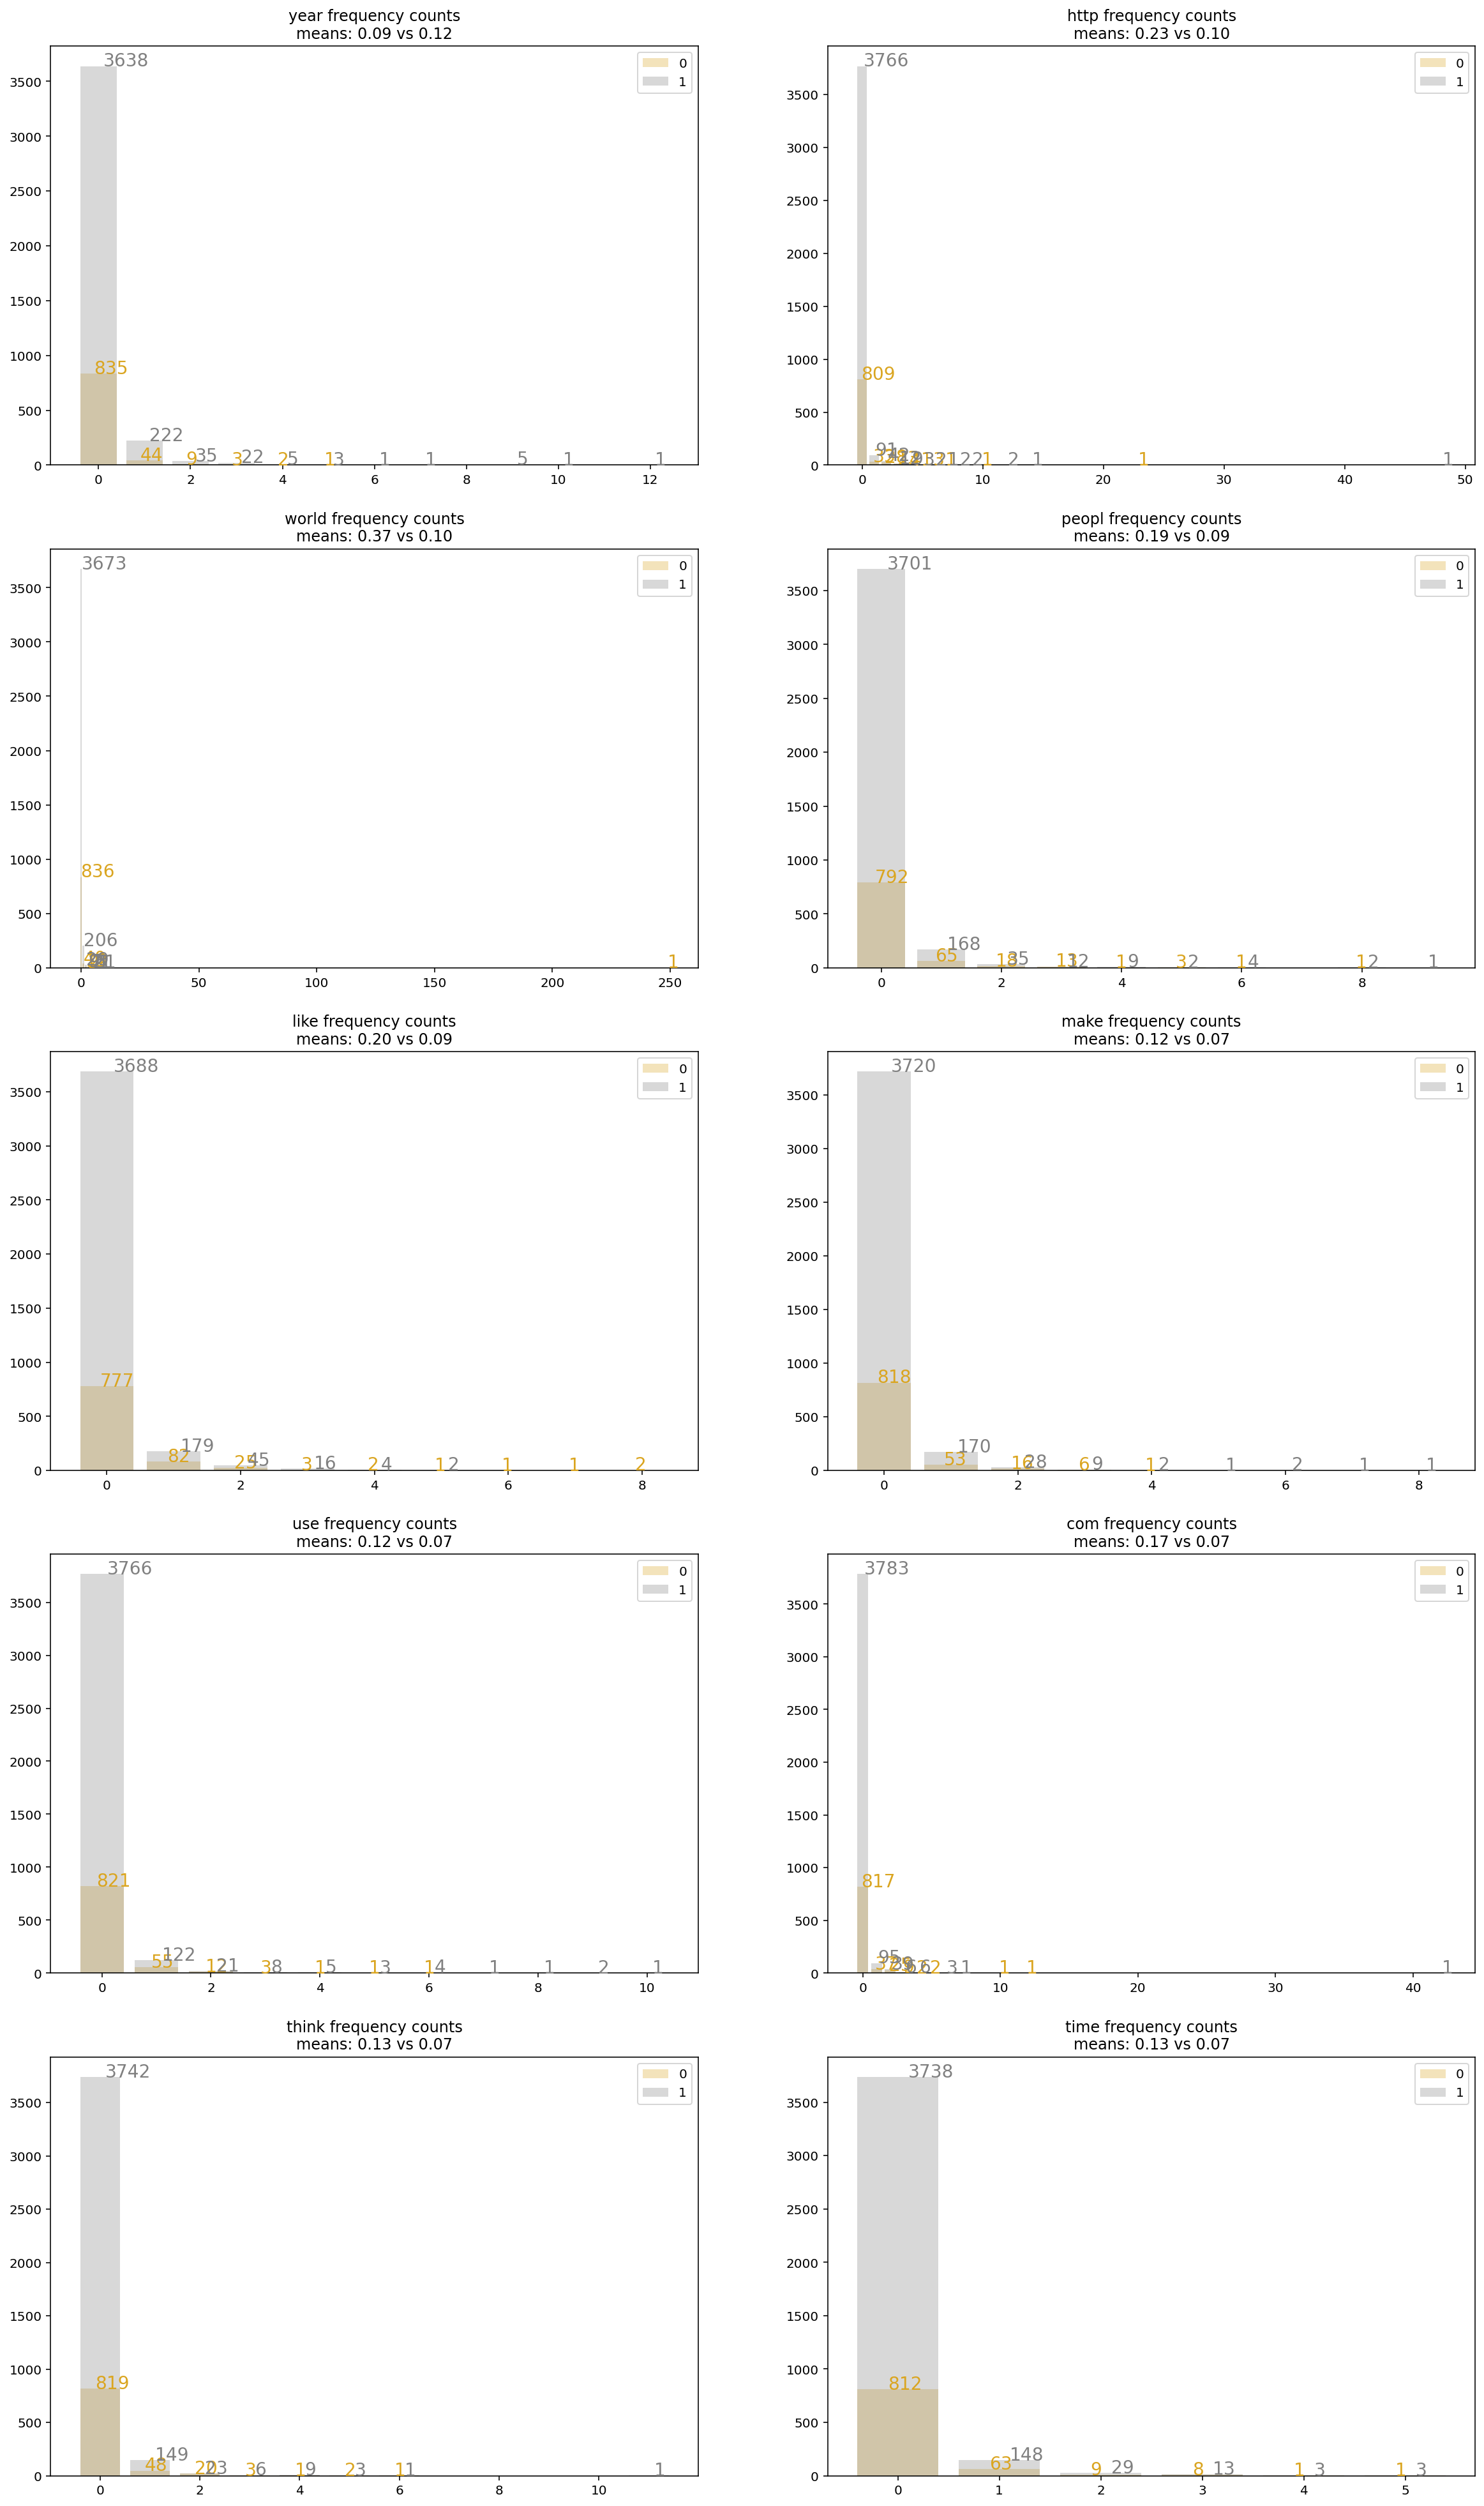

In [44]:
plot_cvec_dist(top_words_overlap, term_df)

Pickling the dataframe as they are large!

In [45]:
pickle.dump(df_reddit, open('../datasets/df_reddit_for_model.pkl', 'wb'))

In [46]:
print("Hello world!")

Hello world!
